**REQUIRED LIBERARIES**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [3]:
# importing data 
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
counts = df['Category'].value_counts()

**PLOTING DATA**

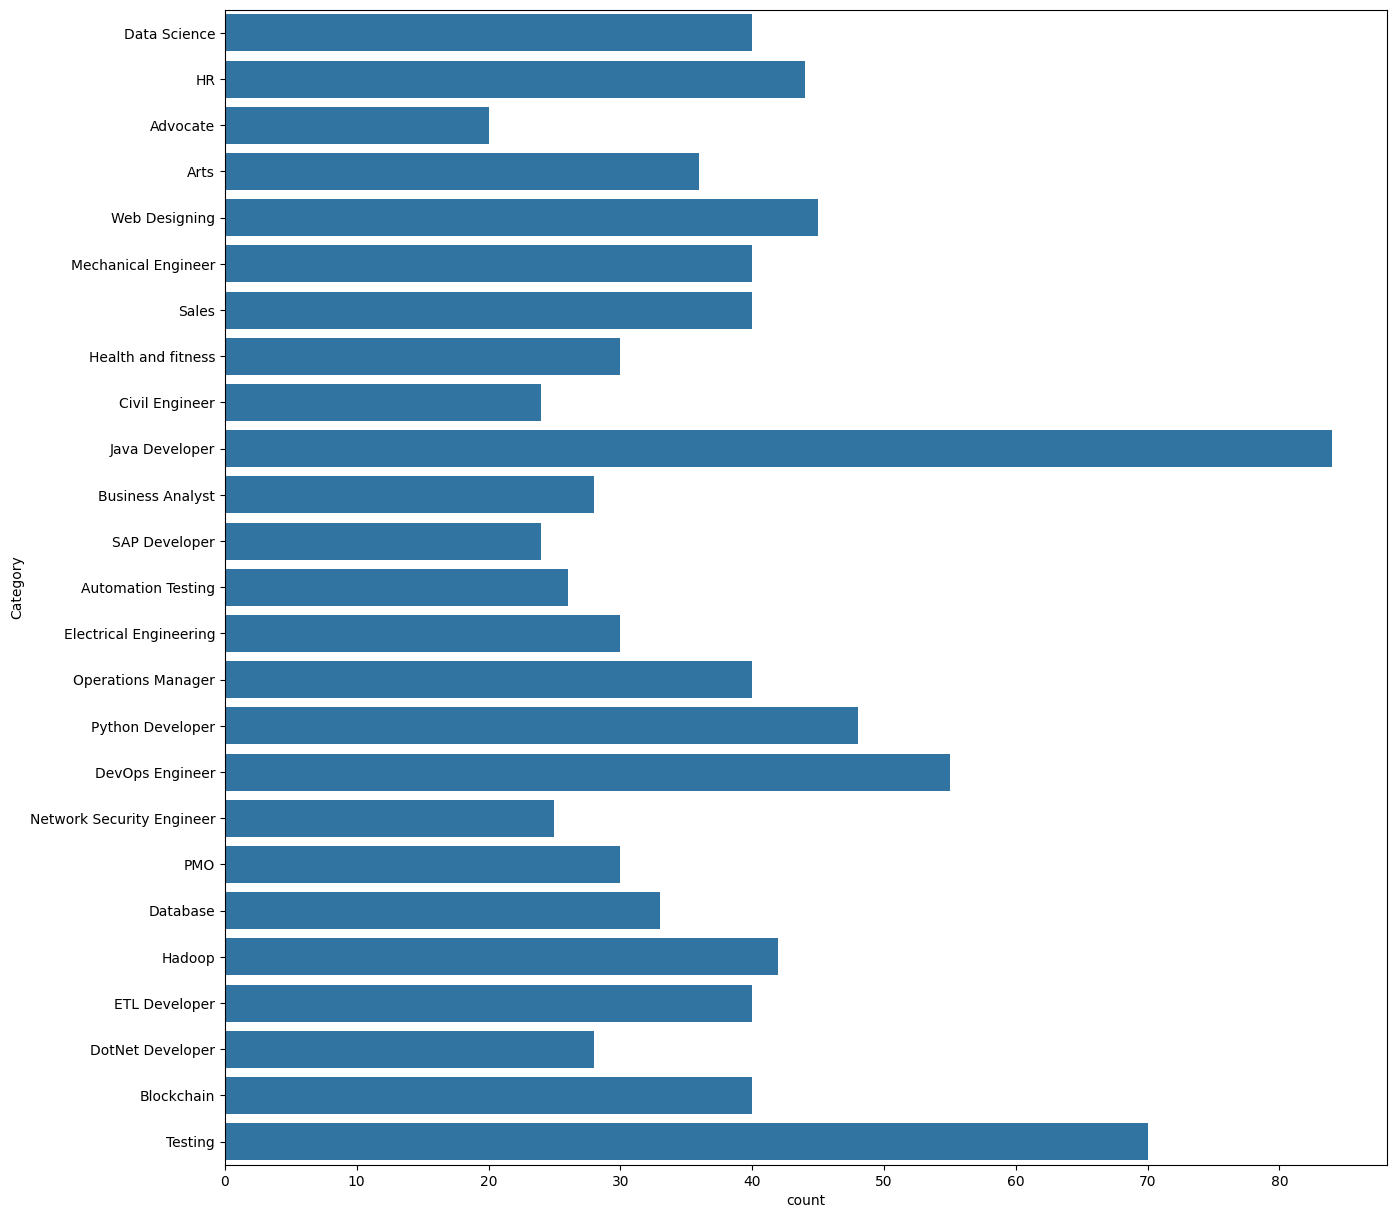

In [6]:
plt.figure(figsize=(15,15))
sns.countplot(y = 'Category', data=df)
plt.show() 

**CLEANING DATA**

In [7]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
english_stopwords = stopwords.words('english')
print(english_stopwords)


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\13zer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import re 
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http[s]?://\S+|www\.\S+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text, re.UNICODE)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = [word for word in text.split() if word not in english_stopwords]
    text = ' '.join(text)
    return text

In [9]:
test = "It's a pleasant day today /https://www.google.com agin rainign not in the evening ^$%**" 
clean_text(test)

'pleasant day today agin rainign evening'

In [10]:
df['Resume'] = df['Resume'].apply(clean_text)

**WORDS INTO CATOGORIAL VALUES**

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df.head()

,Category,Resume
0,6,skills programming languages python pandas num...
1,6,education details may 2013 may 2017 uitrgpv da...
2,6,areas interest deep learning control system de...
3,6,skills â r â python â sap hana â tableau â sap...
4,6,education details mca ymcaust faridabad haryan...


**VECTORIZATION**

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf = TfidfVectorizer(stop_words='english')
word_matrix = Tfidf.fit_transform(df['Resume'])
word_matrix.shape

(962, 7544)

**SPLIT DATA INTO TRAIN TEST**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(word_matrix, df['Category'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((769, 7544), (193, 7544))

**TRAIN MODEL USING ML**

In [14]:
from sklearn.neighbors import KNeighborsClassifier
# OneVsRestClassifier is used to train multiple classes
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score 

knn = OneVsRestClassifier(KNeighborsClassifier())
knn.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

**PREDICTING THE CLASSES**

In [15]:
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.9844559585492227

**SAVING THE MODEL**

In [16]:
import pickle 
pickle.dump(knn, open('resume_model.pkl', 'wb'))
pickle.dump(Tfidf, open('tfidf_vectorizer.pkl', 'wb'))

In [17]:
pickle.dump(le, open('encoder.pkl', 'wb'))